In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import category_encoders as ce
import pandas as pd
from pandas.api.types import is_numeric_dtype
import seaborn as sns

In [2]:
file_name = 'dataset.csv'

In [3]:
data = pd.read_csv(file_name)

In [4]:
data.head()

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Blockhead,"Cheer up, You're Not Dead Yet",44.0,0.00621,0.711,285987.0,0.6210,0.029700,G,0.159,-7.429,Major,0.0382,142.065,0.607,Jazz
1,FloFilz,Corners,34.0,0.34700,0.729,103703.0,0.5150,0.006920,C,0.127,-10.147,Major,0.1840,79.969,0.287,Jazz
2,Bonobo,We Could Forever,51.0,0.01810,0.669,NaN,0.8850,0.880000,G,0.265,-7.080,Minor,0.0378,NaN,0.636,Jazz
3,Nils Landgren,A Child Is Born,39.0,0.91800,0.484,228733.0,0.0693,0.000069,F,0.139,-15.542,Major,0.0346,82.707,0.206,Jazz
4,Masayoshi Takanaka,Samba Pati,36.0,0.03450,0.473,342867.0,0.8230,0.446000,G,0.306,-6.625,Major,0.0630,104.694,0.383,Jazz


##  فاز صفر : EDA and Visualization 
###  سوال 1)
متد describe برای مشاهده برخی جزئیات آماری اولیه مانند میانگین، std و غیره از یک دیتا‌فریم یا یک دیتا‌سری استفاده می‌شود.

In [5]:
data.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,30000.000000,30000.000000,30000.000000,2.699000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,27067.000000,30000.000000
mean,47.769533,0.359661,0.540929,2.466460e+05,0.556709,0.180807,0.183610,-10.079862,0.083861,117.559824,0.446563
std,14.512665,0.364182,0.181719,1.126005e+05,0.277856,0.329365,0.150733,6.953936,0.093366,30.719934,0.248745
min,0.000000,0.000001,0.059600,1.550900e+04,0.000792,0.000000,0.015700,-47.046000,0.022300,34.347000,0.000000
25%,39.000000,0.029600,0.423000,1.904930e+05,0.361000,0.000000,0.095800,-12.057250,0.035000,92.340000,0.243000
50%,49.000000,0.205000,0.553000,2.245600e+05,0.602000,0.000089,0.122000,-7.623000,0.045100,115.491000,0.435000
75%,57.000000,0.710000,0.671000,2.726670e+05,0.786000,0.125250,0.222000,-5.429750,0.080300,139.817500,0.639000
max,99.000000,0.996000,0.977000,3.195440e+06,0.998000,0.994000,0.996000,1.342000,0.941000,219.331000,0.985000


برای دریافت یک نمای کلی سریع از مجموعه داده، از تابع info استفاده می‌شود.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       28506 non-null  object 
 1   track_name        30000 non-null  object 
 2   popularity        30000 non-null  float64
 3   acousticness      30000 non-null  float64
 4   danceability      30000 non-null  float64
 5   duration_ms       26990 non-null  float64
 6   energy            30000 non-null  float64
 7   instrumentalness  30000 non-null  float64
 8   key               30000 non-null  object 
 9   liveness          30000 non-null  float64
 10  loudness          30000 non-null  float64
 11  mode              30000 non-null  object 
 12  speechiness       30000 non-null  float64
 13  tempo             27067 non-null  float64
 14  valence           30000 non-null  float64
 15  music_genre       30000 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

###  سوال 2)
برای بدست آوردن داده های از دست رفته از ترکیب دو متد isnull و sum به منظور شمارش مقادیر از دست رفته در هر ستون استفاده شده است.

In [7]:
def print_missing_percentage(data):
    missing_values = data.isnull().sum() * 100 / len(data)
    missing_values = pd.DataFrame({'Property': data.columns,
                                 'MissingValuesPercentage': missing_values})
    missing_values.sort_values('MissingValuesPercentage', inplace=True, ascending=False)
    missing_values.reset_index(inplace=True, drop=True)
    print(missing_values)

In [8]:
print_missing_percentage(data)

            Property  MissingValuesPercentage
0        duration_ms                10.033333
1              tempo                 9.776667
2        artist_name                 4.980000
3         track_name                 0.000000
4         popularity                 0.000000
5       acousticness                 0.000000
6       danceability                 0.000000
7             energy                 0.000000
8   instrumentalness                 0.000000
9                key                 0.000000
10          liveness                 0.000000
11          loudness                 0.000000
12              mode                 0.000000
13       speechiness                 0.000000
14           valence                 0.000000
15       music_genre                 0.000000


### سوال 3)
با توجه به نمودارهای فوق مشخص است که توزیع مشخصه های عددی danceability ، duration_ms نرمال و liveness ، popularity تقریبا نرمال می باشد. 

In [9]:
numerical_features = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness',
                      'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

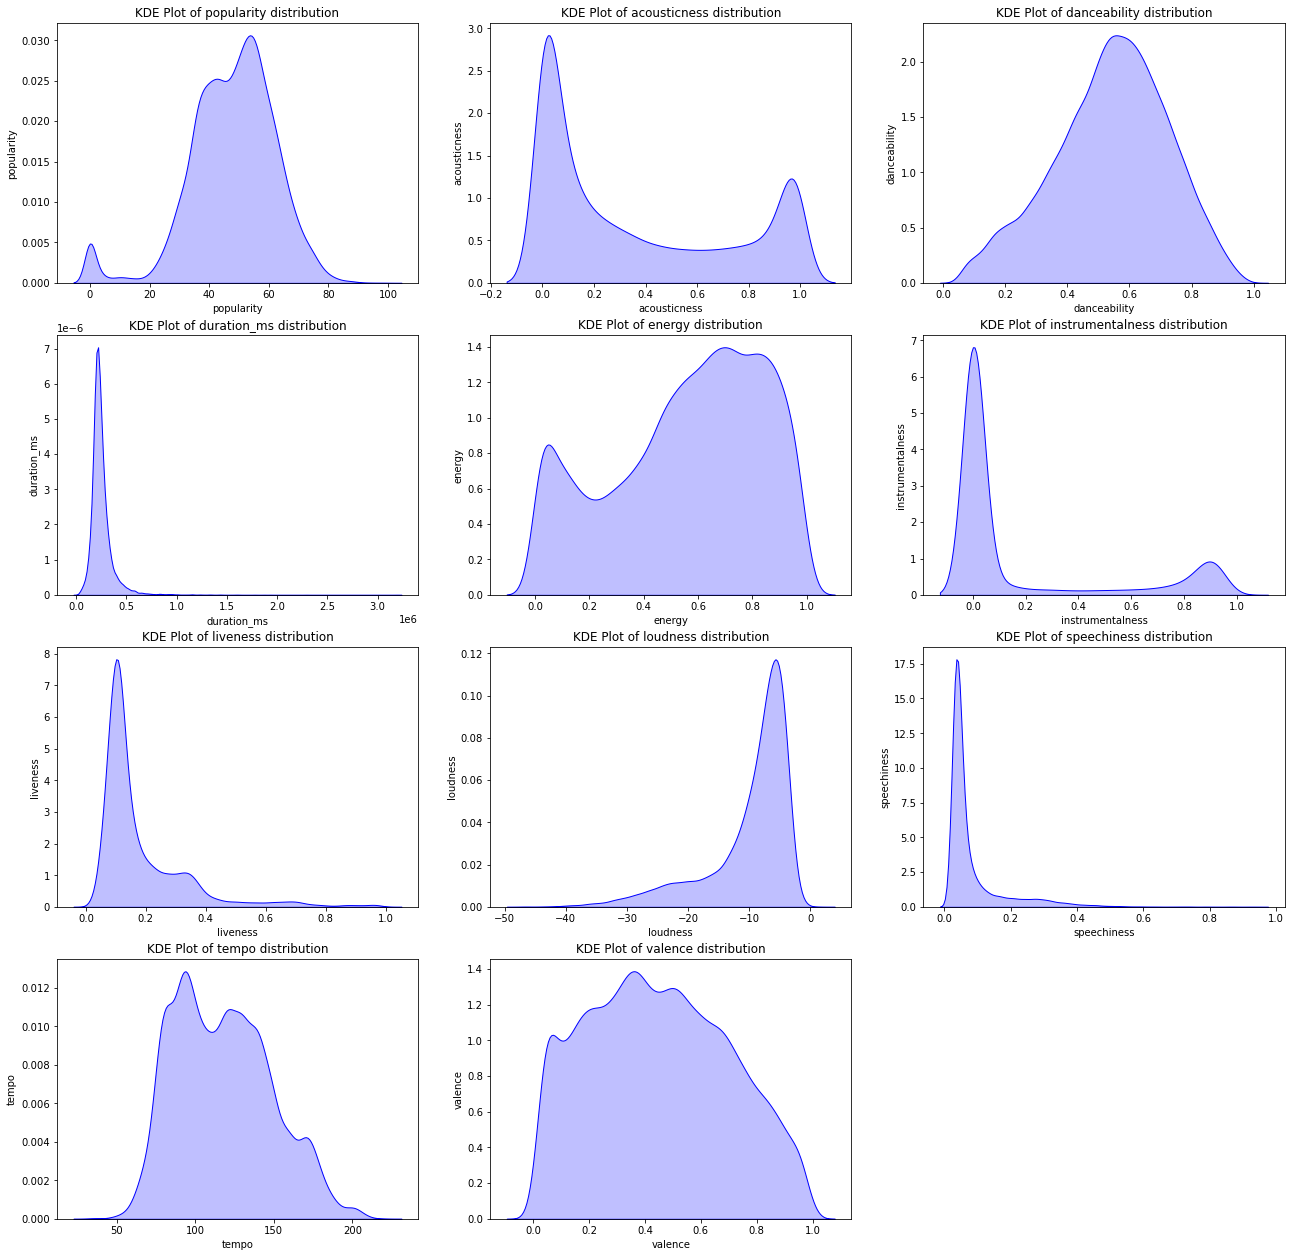

In [10]:
plt.figure(figsize=(22, 22))

for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i + 1)
    # set KDE plot, title and labels
    sns.kdeplot(data[feature], shade=True, color='b') 
    plt.title(f'KDE Plot of {feature} distribution') 
    plt.ylabel(feature)

In [11]:
def draw_cat_plot(attribute, target):
    data.groupby(attribute)[target].value_counts().unstack(target).plot.bar(stacked=True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.ylabel('Counts')
    plt.title(f'{attribute} distribution', fontsize=22)

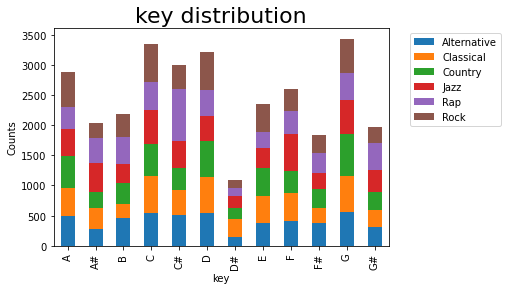

In [12]:
draw_cat_plot('key', 'music_genre')

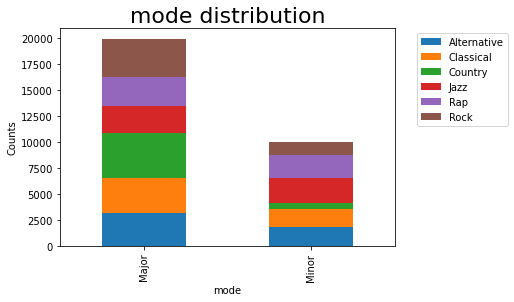

In [13]:
draw_cat_plot('mode', 'music_genre')

In [14]:
def draw_category_plot(attribute):
    data.groupby(attribute)['music_genre'].count().plot.bar(y = 'count', color = 'green')

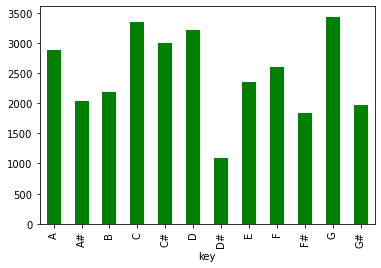

In [15]:
draw_category_plot('key')

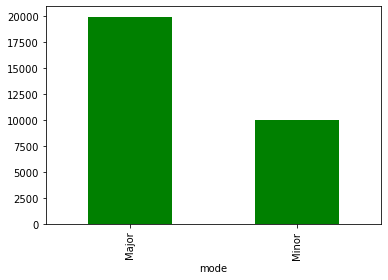

In [16]:
draw_category_plot('mode')

توزیع مشخصه های غیر عددی mode و key مطابق نمودارهای فوق می باشد.

##  فاز اول : Preprocessing
###   سوال 1)
####  حذف سطرها یا ستون ها:  
این روش معمولاً برای رسیدگی به مقادیر null استفاده می شود. در اینجا، اگر یک سطر خاص دارای مقدار null برای یک ویژگی خاص باشد و یا یک ستون خاص بیش از 70-75٪ مقادیر آن از دست رفته باشد، حذف می‌شود. این روش تنها زمانی توصیه می شود که نمونه‌های کافی در مجموعه داده وجود داشته باشد.
####  جایگزینی با Mean ، Median یا Mode:  
این روش را می توان بر روی یک ویژگی که داده های عددی دارد اعمال کرد. می‌توانیم میانگین، میانه یا مد ویژگی را محاسبه کرده و مقادیر از دست رفته با آن جایگزین شود. این تقریبی است که می تواند واریانس را به مجموعه داده اضافه کند اما از دست دادن داده ها را از بین می برد و نتایج بهتری در مقایسه با حذف سطرها و ستون ها دارد. جایگزینی با سه تقریب بالا، یک رویکرد آماری برای مدیریت مقادیر از دست رفته است.  
####  اختصاص یک دسته منحصر به فرد:  
یک ویژگی دسته ای دارای تعدادی کلاس خواهد بود. بنابراین، امکان دارد کلاس دیگری را برای مقادیر از دست رفته اختصاص داده شود. مثلاً U برای «ناشناخته». این روش اطلاعات بیشتری را به مجموعه داده اضافه می کند که منجر به تغییر واریانس می شود.
####  پیش‌بینی مقادیر گمشده:   
با کمک الگوریتم یادگیری ماشین، مقادیر null پیش‌بینی شود. این عمل را می توان با استفاده از ویژگی هایی که مقادیر از دست رفته ندارند انجام داد. این روش ممکن است منجر به دقت بهتری شود.


###  مقایسه تکنیک ها  
حذف کامل داده‌های با مقادیر از دست رفته منجر به مدلی قوی و بسیار دقیق می‌شود و حذف یک ردیف یا ستون خاص بدون اطلاعات خاص بهتر است، زیرا وزن بالایی در یادگیری ندارد. اما گاهی اوقات ممکن است منجر به از دست رفتن اطلاعات و داده‌ها شود. اگر درصد مقادیر از دست رفته در مقایسه با کل مجموعه داده زیاد باشد، این روش توصیه نمی شود.
هنگامی که اندازه داده ها کوچک باشد، رویکرد آماری رویکرد بهتری است و از دست دادن داده ها که منجر به حذف سطرها و ستون ها می شود جلوگیری می‌کند. اما، انتساب تقریب‌ها واریانس و بایاس را اضافه می‌کند و در مقایسه با سایر روش‌های انتساب ضعیف‌ترعمل می‌کند.
اختصاص یک دسته منحصر به فرد واریانس کمتری را اضافه می کند البته این روش ویژگی دیگری را به مدل اضافه می کند، که ممکن است منجر به عملکرد ضعیف مدل شود.
در روش استفاده از الگوریتم‌هایی که مقادیر گمشده را پیش‌بینی می‌کنند همبستگی داده ها نادیده گرفته می شود و از طرفی این روش یک فرآیند بسیار وقت گیر است و می تواند در داده کاوی در پایگاه های داده بزرگ این زمان حیاتی باشد.

In [17]:
len(data['artist_name'].value_counts())

5090

###  سوال 2)  
ویژگی artist_name گر‌چه ویژگی مناسبی برای کلاس بندی می باشد ولی به دلیل تعداد زیاد خواننده (5090) این ویژگی حذف شده است همچنین ویژگی track_name دارای اطلاعات مفیدی برای مدل نمی‌باشد و حذف شده است. 
مقادیر null ویژگ tempo با مقدار میانه جایگزین شده اند.
از انجا که ویژگی duration_ms اطلاعاتی در مورد ژانر موسیقی ندارد می توان از آن نیز صرف نظر کرد. 

In [18]:
def replace_nan_by_median(data, attributes):
    for attribute in attributes:
        data[attribute] = data[attribute].fillna(data[attribute].median())

In [19]:
def restore_data(file_name):
    attributes = ['tempo']
    data = pd.read_csv(file_name)
    replace_nan_by_median(data, attributes)
    data.drop(['artist_name'], axis=1, inplace=True)
    data.drop(['duration_ms'], axis=1, inplace=True)
    data.drop(['track_name'], axis=1, inplace=True)
    return data

In [20]:
data = restore_data(file_name)

In [21]:
print_missing_percentage(data)

            Property  MissingValuesPercentage
0         popularity                      0.0
1       acousticness                      0.0
2       danceability                      0.0
3             energy                      0.0
4   instrumentalness                      0.0
5                key                      0.0
6           liveness                      0.0
7           loudness                      0.0
8               mode                      0.0
9        speechiness                      0.0
10             tempo                      0.0
11           valence                      0.0
12       music_genre                      0.0


###  سوال 3)
تغییر مقیاس(Re-scaling) داده‌ها معمولا توسط دو روش «استانداردسازی» (Standardization) و «نرمال‌سازی» (Normalization) صورت می‌گیرد.
با کمک تغییر مقیاس بزرگی یا کوچکی هر یک از ویژگی‌ها مبنا و ملاک انتخاب یا نقش آن متغیر در مدلسازی نبوده و همه متغیرها دارای اهمیتی برحسب وزن‌ها یا ضرایبی که توسط مدل ایجاد می‌شوند، خواهند بود. معمولا از دو گروه تبدیل برای از بین بردن مقیاس استفاده می‌شود. گروه تبدیلات «استانداردسازی» (Standardize) و گروه تبدیلات «نرمال‌سازی (Normalization). در ابتدا با مفهوم استانداردسازی آشنا شده و سپس به نرمال‌سازی خواهیم پرداخت.
####  استانداردسازی (Standardization)
استاندار‌دسازی یا تبدیل Z-score، برای یک مجموعه داده، بدست آوردن مقدارهایی است که دارای میانگین صفر و واریانس یا انحراف استاندارد ۱ باشند.استانداردسازی زمانی که با ویژگی و داده‌هایی با مقیاس‌های مختلف سروکار دارید بسیار مهم است. برای مثال در الگوریتم گرادیان کاهشی که یک روش برای بهینه‌سازی محسوب می‌شود، ممکن است بعضی از متغیرها با توجه به مقیاس متفاوتی که دارند، باعث کاهش سریعتر مشتق در یک بعد شوند. یا به عنوان یک مثال دیگر می‌توان به الگوریتم k-نزدیکترین همسایه (K-Nearest Neighbor- KNN) نیز اشاره کرد که با توجه به مقیاس داده‌ها و بهره‌گیری از تابع فاصله اقلیدسی(Euclidean Distance)، وزن بیشتری به متغیرها با مقیاس یا واحدهای بزرگتر بدهد در نتیجه به شکل نادرست گروه یا دسته‌ها تشکیل خواهند شد.
####  نرمال‌سازی (Normalization)
یکی دیگر از روش‌های تغییر مقیاس، استفاده از روش نرمال‌سازی Min-Max است. به این ترتیب علاوه بر یکسان سازی مقیاس داده‌ها، کران‌های تغییر آن‌ها نیز در بازه صفر و یک خواهد بود.این شیوه محاسبه اغلب در زمانی استفاده می‌شود که هدف میزان شباهت بین نقاط باشد. برای مثال در پردازش تصویر و تشخیص پیکسل‌های مشابه از این تبدیل استفاده شده و سپس از الگوریتم‌های خوشه‌بندی برای کاهش تعداد رنگ استفاده می‌شود.

###  سوال 4)  
همان طور که نمودارهای سوال سه فاز صفر نشان می دهد توزیع داده در ویژگی ها تقریبا نرمال می باشد بنابراین از روش استانداردسازی برای تغییر مقیاس استفاده می شود. 

In [22]:
# Define our features 
features = data.drop(['music_genre', 'key', 'mode'], axis=1)
columns= features.columns
# Define our labels
labels = data["music_genre"]

# Scale the features and set the values to a new variable
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)
scaled_train_features = pd.DataFrame(scaled_train_features, columns=columns)
scaled_train_features.head()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,-0.259745,-0.970549,0.935920,0.231385,-0.458790,-0.163274,0.381209,-0.489060,0.846564,0.644998
1,-0.948810,-0.034765,1.034976,-0.150114,-0.527955,-0.375574,-0.009655,1.072566,-1.281064,-0.641481
2,0.222600,-0.937900,0.704790,1.181532,2.122888,0.539967,0.431398,-0.493344,-0.063955,0.761585
3,-0.604278,1.533157,-0.313284,-1.754208,-0.548755,-0.295961,-0.785487,-0.527619,-1.187250,-0.967121
4,-0.810997,-0.892866,-0.373818,0.958392,0.805179,0.811976,0.496829,-0.223434,-0.433898,-0.255538


###  سوال 5)
####  Ordinal Encoding:
اگر ویژگی دسته بندی ترتیبی باشد از این روش استفاده می شود در این مورد، حفظ ترتیب مهم است.
####  One Hot Encoding:
زمانی که ویژگی ها اسمی هستند (هیچ ترتیبی ندارند) از این تکنیک رمزگذاری داده های طبقه بندی شده استفاده می شود. در این روش برای هر مقدار از یک ویژگی دسته بندی، یک متغیر جدید ایجاد می شود و هر دسته با یک متغیر باینری حاوی 0 یا 1 نگاشته می شود. در اینجا، 0 نشان دهنده عدم وجود، و 1 نشان دهنده حضور آن دسته است. این ویژگی های دودویی جدید ایجاد شده به عنوان متغیرهای ساختگی شناخته می شوند. تعداد متغیرهای ساختگی به مقدارهای موجود در متغیر طبقه بندی بستگی دارد.
####  Dummy Encoding:
این روش شبیه One Hot Encoding است و متغیر طبقه بندی را به مجموعه ای از متغیرهای دودویی (همچنین به عنوان متغیرهای ساختگی شناخته می شود) تبدیل می کند در مورد One Hot Encoding برای N دسته در یک متغیر، از N متغیر باینری استفاده می‌کند. Dummy Encoding پیشرفت کوچکی نسبت به رمزگذاری تکی دارد. Dummy Encoding از N - 1 ویژگی نشان دادن N مقدار دسته استفاده می کند.
####  Effect Encoding:
این روش به عنوان Deviation Encoding یا Sum Encoding نیز شناخته می شود. Effect Encoding تقریباً مشابه Dummy Encoding است فقط در Dummy Encoding، از 0 و 1 برای نمایش داده ها استفاده می کنیم، اما در Effect Encoding، از سه مقدار یعنی 0 ، 1 و 1- استفاده می شود.
####  Binary Encoding:
در این روش، ابتدا ویژگی طبقه‌بندی با استفاده از یک رمزگذار ترتیبی به عددی تبدیل می‌شود. سپس اعداد به عدد دودویی تبدیل می شوند. پس از آن مقدار باینری به ستون های مختلف تقسیم می شود. رمزگذاری باینری زمانی که تعداد دسته‌ها زیاد باشد، واقعاً خوب عمل می‌کند.
####  Target Encoding:
این روش یک تکنیک رمزگذاری بیزین است در رمزگذاری هدف، میانگین متغیر هدف برای هر دسته محاسبه سپس متغیر دسته با مقدار میانگین جایگزین می شود. در مورد متغیرهای هدف طبقه بندی شده، احتمال پسین هدف جایگزین هر دسته می شود.   
در این پروژه برای ویژگی های mode , key  از روش One Hot Encoding استفاده شده است ویژگی های ذکر شده ترتیب شان مهم نیست بنابراین امکان استفاده از روش Ordinal Encoding وجود ندارد و دلیل استفاده از One Hot Encoding سهولت و کم بودن تعداد دسته ها می باشد. 

In [23]:
def apply_one_hot_encoder(data, attribute):   
    if (is_numeric_dtype(data[attribute]) == False):
        encoder = ce.OneHotEncoder()  
        encoded = encoder.fit_transform(data[attribute])
        data.drop([attribute], axis=1, inplace=True)
        data = data.join(encoded)
    return data

In [24]:
# Define our features 
features = data.drop(['music_genre'], axis=1)

# Define our labels
labels = data["music_genre"]

features = apply_one_hot_encoder(features, 'mode')
features = apply_one_hot_encoder(features, 'key')
features.head()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,key_12
0,44.0,0.00621,0.711,0.6210,0.029700,0.159,-7.429,0.0382,142.065,0.607,...,0,0,0,0,0,0,0,0,0,0
1,34.0,0.34700,0.729,0.5150,0.006920,0.127,-10.147,0.1840,79.969,0.287,...,0,0,0,0,0,0,0,0,0,0
2,51.0,0.01810,0.669,0.8850,0.880000,0.265,-7.080,0.0378,115.491,0.636,...,0,0,0,0,0,0,0,0,0,0
3,39.0,0.91800,0.484,0.0693,0.000069,0.139,-15.542,0.0346,82.707,0.206,...,1,0,0,0,0,0,0,0,0,0
4,36.0,0.03450,0.473,0.8230,0.446000,0.306,-6.625,0.0630,104.694,0.383,...,0,0,0,0,0,0,0,0,0,0


###  سوال 6)  
ویژگی artist_name گر‌چه ویژگی مناسبی برای کلاس بندی می باشد ولی به دلیل تعداد زیاد خواننده‌ها این ویژگی حذف شده است.

###  سوال 7)  
به کمک متد  mutual_info_classif  می توان information gain  را محاسبه نمود. 

In [27]:
X_train,X_test,y_train,y_test=train_test_split(features, labels, test_size=0.2, random_state=0)
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.51001052, 0.36139905, 0.27876535, 0.32718004, 0.29593251,
       0.02008618, 0.34487628, 0.21673986, 0.09658836, 0.14311513,
       0.02179853, 0.03219488, 0.        , 0.        , 0.00689861,
       0.00093419, 0.        , 0.00267355, 0.00255075, 0.00215375,
       0.        , 0.0015799 , 0.00577939, 0.00243095])

<AxesSubplot:>

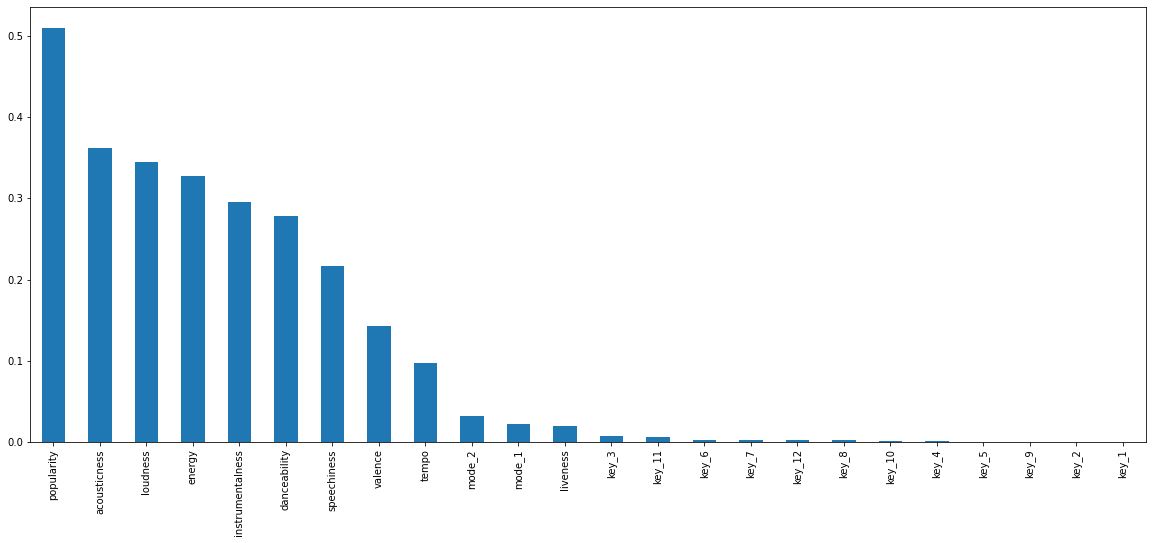

In [28]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

###  سوال 8)   
با توجه به نمودار فوق می توان تنها ویژگی های popularity,acousticness,loudness,energy,instrumentalness,danceability,speechiness,valence را در نظر گرفت و از باقی ویژگی ها صرف نظر کرد زیرا ویژگی های انتخاب شده تغییر بیشتری در آنتروپی ایجاد می کنند. 

##  فاز دوم : Model Training, Evaluation and Hyper Parameter Tuning
###   سوال 1)    
اگر تنها نیاز به داده‌های Train و Test باشد، می‌توان به کمک متد train_test_split این کار را انجام داد در این پروژه P برابر با 0.2 اختیار شده است پس از اجرای متد مذکور 80 درصد داده‌ها برای آموزش و 20 درصد آن‌ها برای آزمایش تخصیص داده خواهند شد این فرآیند به صورت تصادفی اتفاق خواهد افتاد تصادفی بودن این جداسازی الزامی می باشد تا سوگیری در نتایج مدل اتفاق نیفتد.
از طرفی اسفاده از پارامتر stratify باعث خواهد شد که نسبت مقادیر در نمونه تولید شده با نسبت مقادیر ارائه شده یکسان خواهد بود از انجا که تعداد داده های هر کلاس مساوی است پس از جداسازی نیز این تعداد برابر خواهد بود.به عنوان مثال، اگر ویژگی music_genre یک متغیر دسته‌بندی با مقادیر Jazz, Alternative, Country, Rap, Rock, Classical باشد و 5000 داده در هر کلاس وجود داشته باشد stratify=y مطمئن خواهد شد که تقسیم تصادفی شما نیز دارای نسبت 1 به 6 است.

In [43]:
# Define our features 
columns = ['popularity', 'acousticness', 'loudness', 'energy', 
                'instrumentalness', 'danceability', 'speechiness', 'valence']
features = data[columns]

# Define our labels
labels = data['music_genre']

# Scale the features and set the values to a new variable
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)
scaled_train_features = pd.DataFrame(scaled_train_features, columns=columns)
scaled_train_features.head()

# Split our data
train_features, test_features, train_labels, test_labels = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.2, 
                                                                            random_state=10)
_, counts = np.unique(train_labels, return_counts=True)
print(counts / float(len(y_train)))

[0.16570833 0.16629167 0.166125   0.166875   0.16775    0.16725   ]


###   سوال 2)  

In [32]:
# Define our features 
columns = ['popularity', 'acousticness', 'loudness', 'energy', 
                'instrumentalness', 'danceability', 'speechiness', 'valence']
features = data[columns]

# Define our labels
labels = data['music_genre']

# Scale the features and set the values to a new variable
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)
scaled_train_features = pd.DataFrame(scaled_train_features, columns=columns)
scaled_train_features.head()

# Split our data
X_train, X_test, y_train, y_test = train_test_split(scaled_train_features, 
                                                                            labels, 
                                                                            test_size=0.2, 
                                                                            random_state=1,
                                                                            stratify=labels)
_, counts = np.unique(train_labels, return_counts=True)
print(counts / float(len(y_train)))

[0.16570833 0.16629167 0.166125   0.166875   0.16775    0.16725   ]


###  سوال 3)

In [33]:
def draw_parameter_tuning_plot(results, parameter):
    plt.figure(figsize=(20, 12))
    plt.title("GridSearchCV evaluating",
              fontsize=16)

    plt.xlabel("min_samples_split", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)

    ax = plt.gca()
    X_axis = np.array(results[f'param_{parameter}'].data, dtype=float)

    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results[f'mean_{sample}_score']
        sample_score_std = results[f'std_{sample}_score']
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.3 if sample == 'test' else 0, color='g')
        ax.plot(X_axis, sample_score_mean, style, color='r',
                alpha=1 if sample == 'test' else 0.7,
                label=f'score ({sample})')

    best_index = np.nonzero(results['rank_test_score'] == 1)[0][0]
    best_score = results['mean_test_score'][best_index]

    ax.plot([X_axis[best_index], ] * 2, [best_score, 1],
            linestyle='-.', color='b', marker='x', markeredgewidth=3, ms=8)

    ax.annotate("%0.1f" % best_score,
                (X_axis[best_index], best_score + 0.005))

    plt.legend(loc="best")
    plt.grid(False)
    plt.show()

####  رسم نمودار دقت برای مدل K Nearest Neighbors

In [34]:
MAX_NEIGHBOURS = 40

def tune_k_neighbors_params(features, labels):   
    gridParams = {'n_neighbors': list(range(1, MAX_NEIGHBOURS+1, 2))}

    gs = GridSearchCV(
        KNeighborsClassifier(),
        gridParams,
        scoring='accuracy',
        return_train_score=True,
        verbose=1
    )

    gsResult = gs.fit(features, labels)
    k_neighbors = gsResult.best_estimator_ 
    print(gsResult.best_params_)
    results = gs.cv_results_
    draw_parameter_tuning_plot(results, 'n_neighbors')
    return k_neighbors

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'n_neighbors': 35}


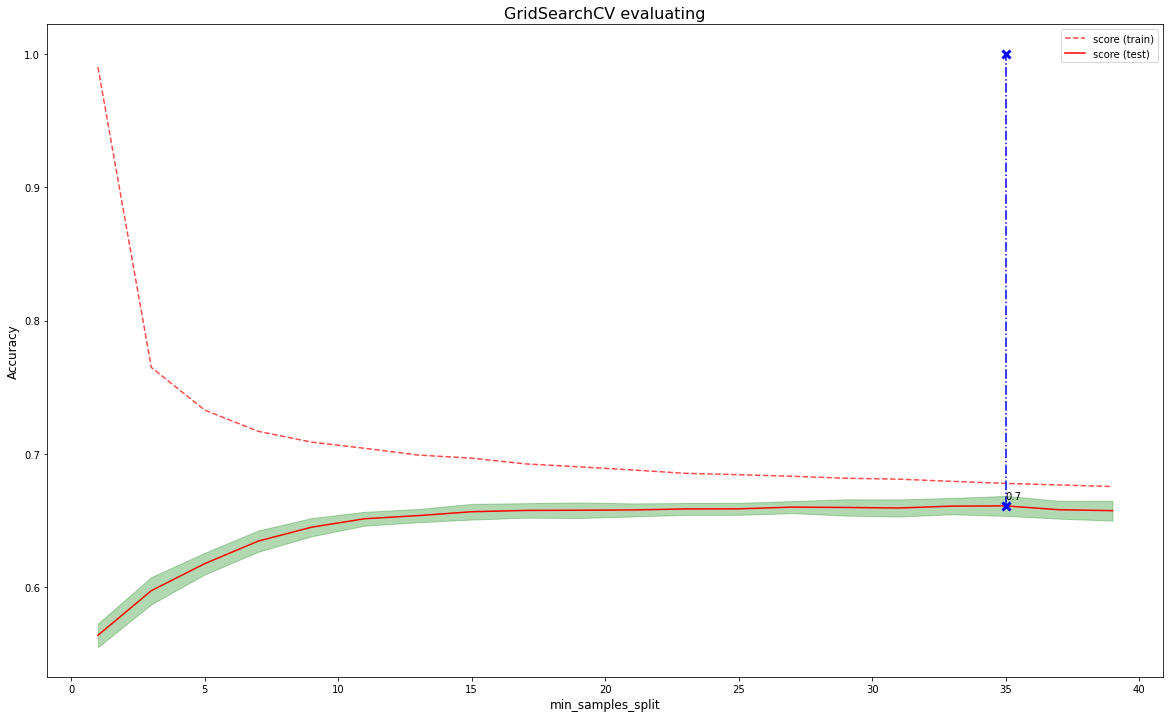

In [35]:
k_neighbors = tune_k_neighbors_params(X_train, y_train)

با توجه به نمودار مقدار فوق بهینه kNeighbors برابر با 35 بدست می‌آید. 

###  سوال 4)
####  رسم نمودار دقت برای مدل Decision Tree

In [36]:
MAX_DEPTH = 20
MIN_SAMPLES_LEAF = 4
def tune_desicion_tree_params(features, labels):    
    gridParams = {'max_depth': list(range(1, MAX_DEPTH+1, 2)), 'min_samples_leaf' : list(range(1, MIN_SAMPLES_LEAF+1))}

    gs = GridSearchCV(
        DecisionTreeClassifier(),
        gridParams,
        scoring='accuracy',
        return_train_score=True
    )

    gsResult = gs.fit(features, labels)
    decision_tree = gsResult.best_estimator_ 
    print(gsResult.best_params_)
    results = gs.cv_results_
    draw_parameter_tuning_plot(results, 'max_depth')
    draw_parameter_tuning_plot(results, 'min_samples_leaf')
    return decision_tree

{'max_depth': 9, 'min_samples_leaf': 2}


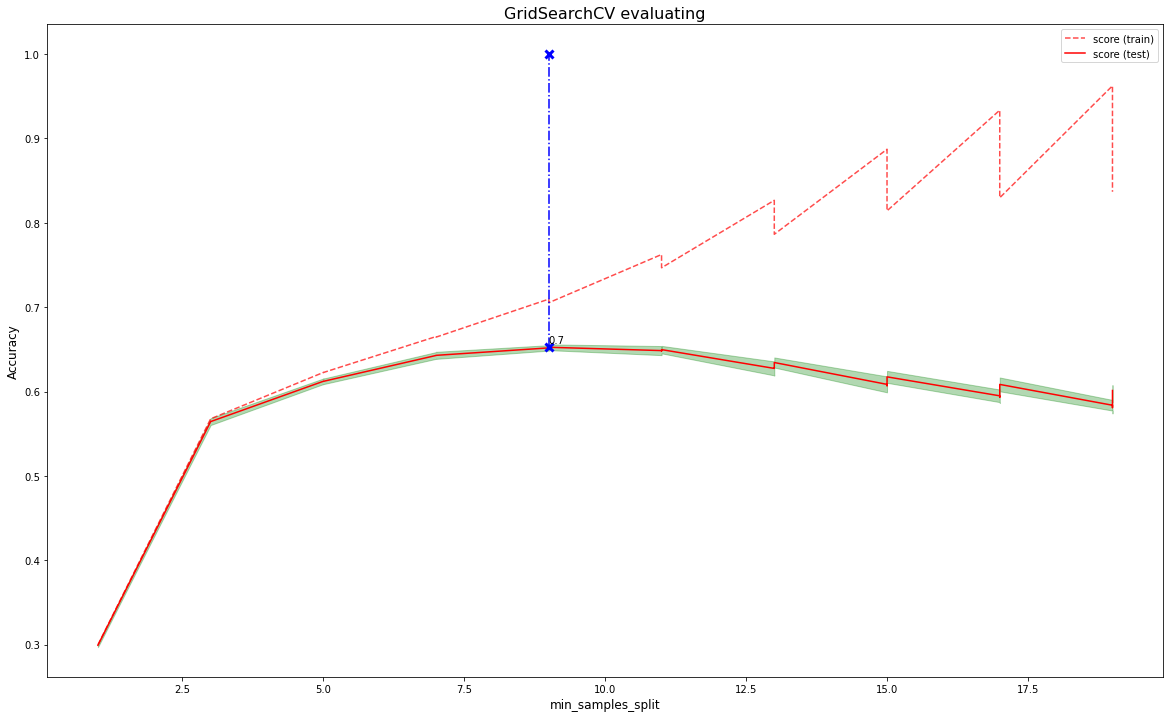

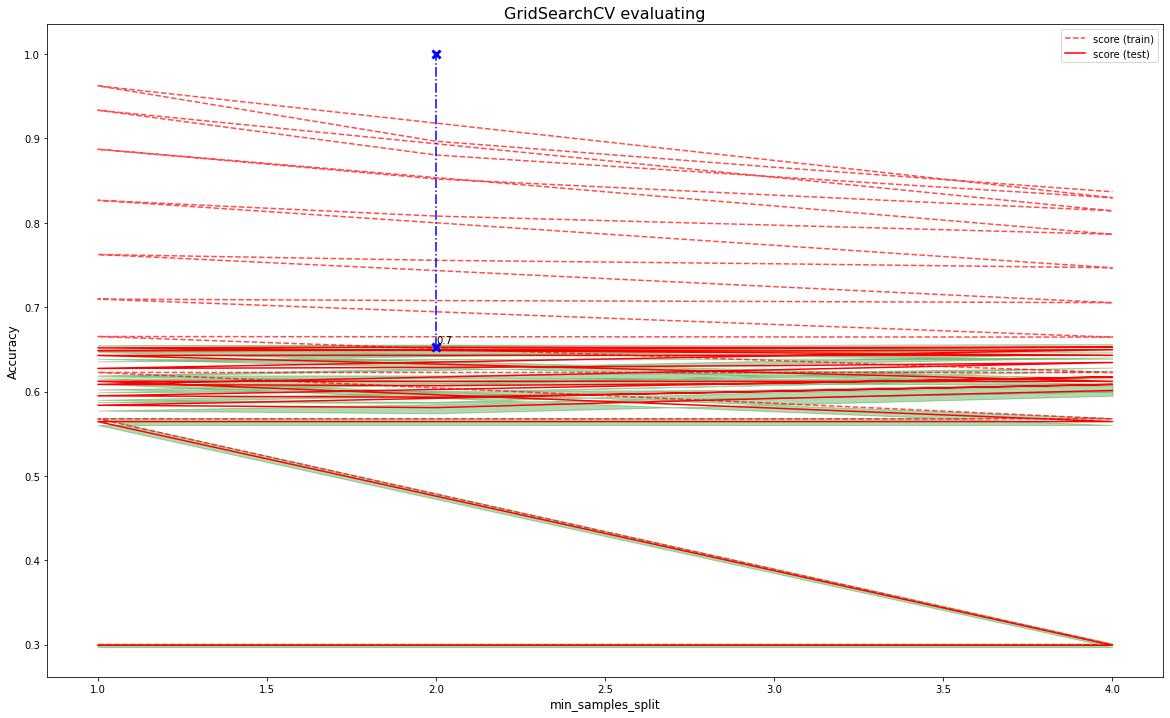

In [37]:
decision_tree = tune_desicion_tree_params(X_train, y_train)

### سوال 5)  
Overfitting شدن به معنای این است که الگوریتم فقط داده‌هایی که در مجموعه آموزشی (train) یاد گرفته است را می‌تواند به درستی پیش‌بینی کند ولی اگر داده‌ای کمی از مجموعه‌ی آموزشی فاصله داشته باشد، مدلی که Overfitting شده باشد، نمی‌تواند به درستی پاسخی برای این داده‌های جدید پیدا کند و آن‌ها را با اشتباهِ زیادی طبقه‌بندی می کند.

Underfitting شدن نیز زمانی رخ می دهد که الگوریتم یک مدلِ خیلی کلی از مجموعه آموزشی به دست می‌آورد. یعنی حتی اگر خودِ داده‌های مجموعه‌ی آموزشیدر اختیار مدل قرار گیرد الگوریتم خطایی قابل توجه خواهد داشت.

###  Overfitting یا Underfitting در مدل های ما
####  K Nearest Neighbors:
بر اساس نتایج به دست آمده می توان دریافت که این مدل نسبت به مدل های دیگر دارای خطاهای بیشتری بوده و به نظر می رسد که این مدل دارای Underfitting است. اما از انجایی که خطای train و test به همدیگر نزدیک هستند Overfitting وجود ندارد.

####  Decision Tree:
در این مدل هر چه عمق درخت بیشتر شود، امکان Overfitting بیشتر خواهیم داشت. از انجایی که یک محدوده برای عمق تعریف شده است ممکن است طبقه بندی مقدار بسیار بزرگی را برای این هایپرپارامتر انتخاب کند و سپس نتایج خوبی در داده‌های trainig بدست آید، اما روی داده‌های آزمایشی به خوبی کار نکند. در این مدل هUnderfitting وجود ندارد.

### سوال 6)  
####  معیار accuracy یا صحت
شاید اولین و ساده‌ترین معیاری باشد که ما سراغ آن خواهیم رفت معیار accuracy یا همان صحت است که برابر است با تعداد مواردی که درست پیش بینی کردیم که آن را True Positive می‌نامیم تقسیم بر تعداد کل پیش بینی‌هایی که انجام شده‌است.
![alt text](accuracy.png "Title")
####  معیار Recall یا یادآوری
حداکثر مقدار این معیار یک ویا ۱۰۰ درصد و حداقل مقدار آن صفر است و هرچه مواردی که ما انتظار داشتیم positive پیش بینی شوند ولی برنامه اشتباه پیش بینی کرده‌است که به آن False Negative می‌گوییم نسبت به پیش بینی‌های درست یا True Positive بیشتر باشد مقدار Recall کمتر خواهد شد. 
![alt text](recall.png "Title")
####  معیار Precision یا دقت
حداکثر مقدار این معیار یک ویا ۱۰۰ درصد و حداقل مقدار آن صفر است و هرچه مواردی که برنامه‌ به غلط پیش بینی کرده است که به آن False Positive می‌گوییم نسبت به پیش بینی‌های درست یا True Positive بیشتر باشد مقدار Precision کمتر خواهد شد.
![alt text](precision.png "Title")
####  معیار f1-score
زمانی که می‌خواهید معیار ارزیابی شما میانگینی از دو مورد قبلی باشد یعنی همان Recall یا Precision می‌توانید از میانگین هارمونیک این دو معیار استفاده کنید که به آن معیار f1-score می‌گویند.
![alt text](f1_score.png "Title")

در ادامه معیارهای فوق در مدل های K Nearest Neighbors و Decision Tree  برای داده های train  و test محاسبه شده است.

In [38]:
target_names = data['music_genre'].unique().tolist()
STARS = ' ***** '
def print_prediction_results(train_pred, test_pred, classification_name):
    print(STARS, classification_name + 'train set', STARS)
    print(classification_report(y_train, train_pred, target_names=target_names))
    print(STARS, classification_name + 'test set', STARS)
    print(classification_report(y_test, test_pred, target_names=target_names))

In [39]:
def run_k_neighbors_model(k_neighbors):
    k_neighbors = k_neighbors.fit(X_train, y_train)
    train_pred = k_neighbors.predict(X_train)
    test_pred = k_neighbors.predict(X_test)
    print_prediction_results(train_pred, test_pred, ' K Nearest Neighbours ')

In [40]:
run_k_neighbors_model(k_neighbors)

 *****   K Nearest Neighbours train set  ***** 
              precision    recall  f1-score   support

        Jazz       0.57      0.42      0.49      4000
 Alternative       0.91      0.88      0.89      4000
     Country       0.59      0.62      0.60      4000
         Rap       0.71      0.64      0.67      4000
        Rock       0.75      0.80      0.77      4000
   Classical       0.57      0.73      0.64      4000

    accuracy                           0.68     24000
   macro avg       0.68      0.68      0.68     24000
weighted avg       0.68      0.68      0.68     24000

 *****   K Nearest Neighbours test set  ***** 
              precision    recall  f1-score   support

        Jazz       0.51      0.38      0.44      1000
 Alternative       0.91      0.86      0.88      1000
     Country       0.56      0.60      0.58      1000
         Rap       0.70      0.64      0.67      1000
        Rock       0.71      0.79      0.74      1000
   Classical       0.54      0.66    

In [41]:
def run_desicion_tree_model(decision_tree):
    decision_tree = decision_tree.fit(X_train, y_train)
    train_pred = decision_tree.predict(X_train)
    test_pred = decision_tree.predict(X_test)
    print_prediction_results(train_pred, test_pred, ' Decision Tree ')      

In [42]:
run_desicion_tree_model(decision_tree)

 *****   Decision Tree train set  ***** 
              precision    recall  f1-score   support

        Jazz       0.61      0.43      0.51      4000
 Alternative       0.94      0.89      0.91      4000
     Country       0.61      0.63      0.62      4000
         Rap       0.73      0.72      0.73      4000
        Rock       0.78      0.80      0.79      4000
   Classical       0.57      0.74      0.64      4000

    accuracy                           0.70     24000
   macro avg       0.71      0.70      0.70     24000
weighted avg       0.71      0.70      0.70     24000

 *****   Decision Tree test set  ***** 
              precision    recall  f1-score   support

        Jazz       0.52      0.35      0.42      1000
 Alternative       0.89      0.84      0.86      1000
     Country       0.58      0.62      0.60      1000
         Rap       0.65      0.64      0.65      1000
        Rock       0.73      0.75      0.74      1000
   Classical       0.50      0.66      0.57      10

### سوال 7)  
####  مدیریت داده هاي گمشده
بدون مدیریت این مقادیر كارايي مدل کاهش می یابد این امر بدیهی است، زیرا ما با حذف اي ويژگي ها اطلاعات مهم را از دست می دهیم.
#### مديريت داده هاي دسته اي
از انجايي كه ويژگي هاي mode و key در آموزش تاثير چنداني نداشتند حذف شده اند و بنابراين مديريت آنها در اين پروژه بي فايده بوده است.

##  فاز سوم : Ensemble Methods
###   سوال 1)

In [44]:
MAX_ESTIMATORS = 20
MAX_DEPTH = 20
MIN_SAMPLES_LEAF = 4
def tune_random_forest_params(features, labels):
    gridParams = {'n_estimators': list(range(1, MAX_ESTIMATORS+1, 2)),
                  'max_depth': list(range(1, MAX_DEPTH+1, 2)), 
                  'min_samples_leaf' : list(range(1, MIN_SAMPLES_LEAF+1))}

    gs = GridSearchCV(
        RandomForestClassifier(),
        gridParams,
        scoring='accuracy',
        return_train_score=True
    )

    gsResult = gs.fit(features, labels)
    random_forest = gsResult.best_estimator_ 
    print(gsResult.best_params_)
    results = gs.cv_results_
    draw_parameter_tuning_plot(results, 'n_estimators')
    draw_parameter_tuning_plot(results, 'min_samples_leaf')
    draw_parameter_tuning_plot(results, 'max_depth')
    return random_forest

{'max_depth': 13, 'min_samples_leaf': 4, 'n_estimators': 19}


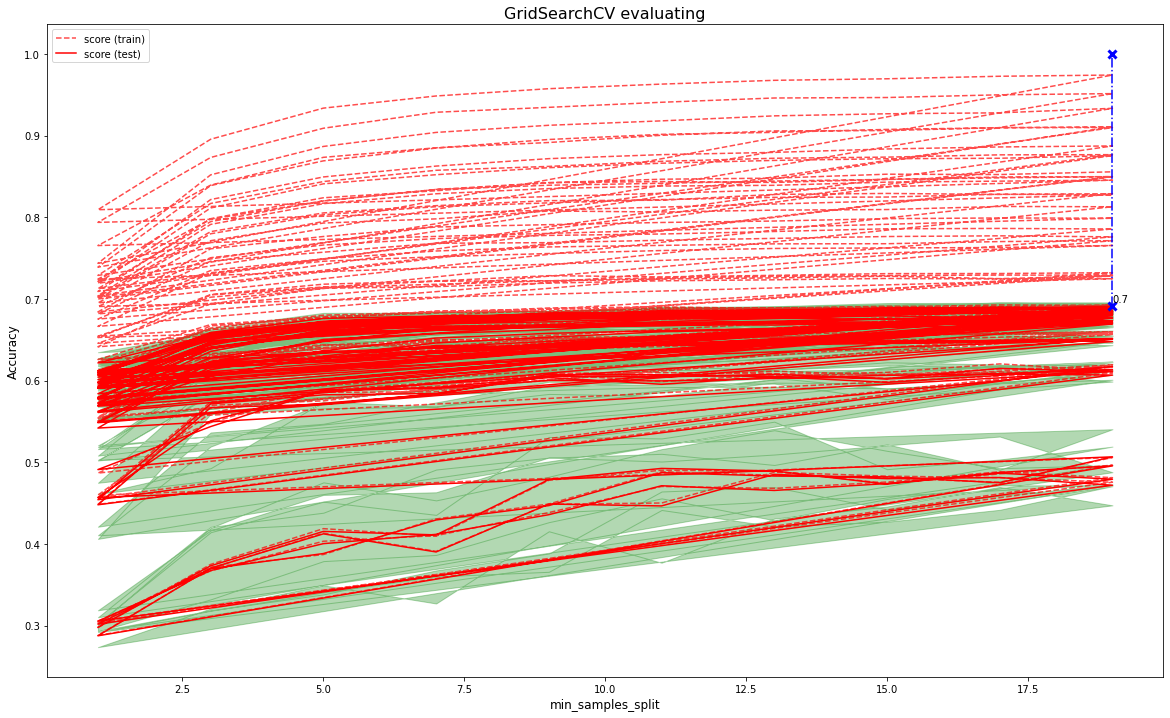

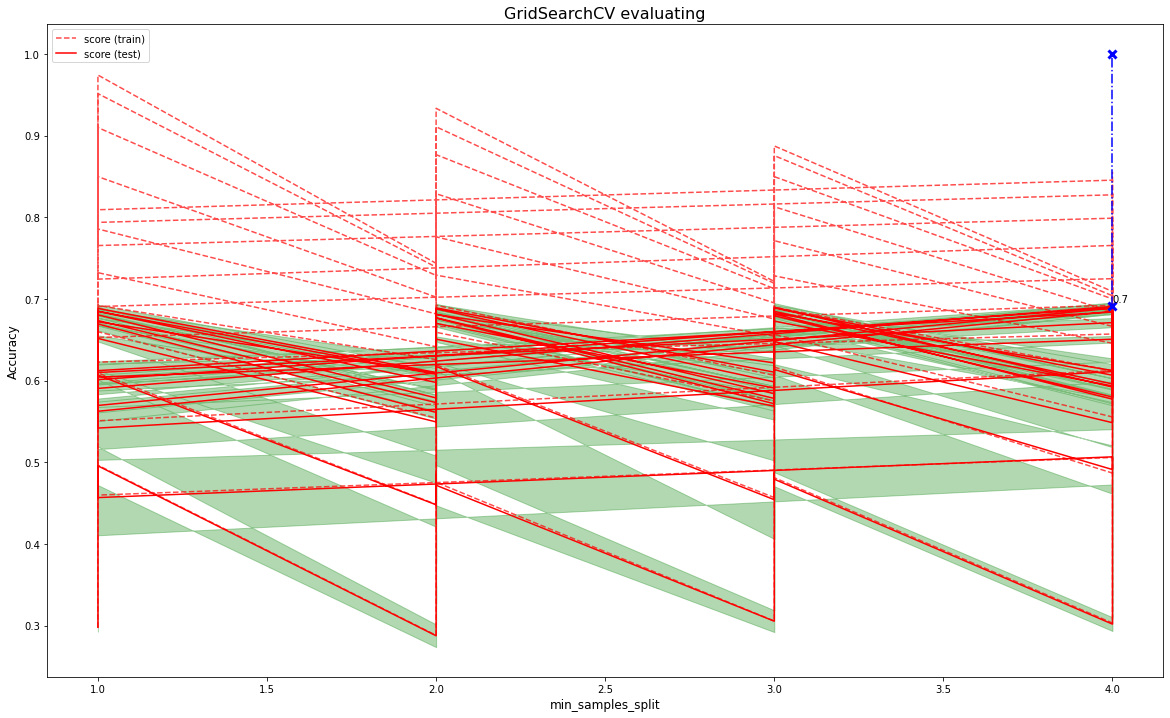

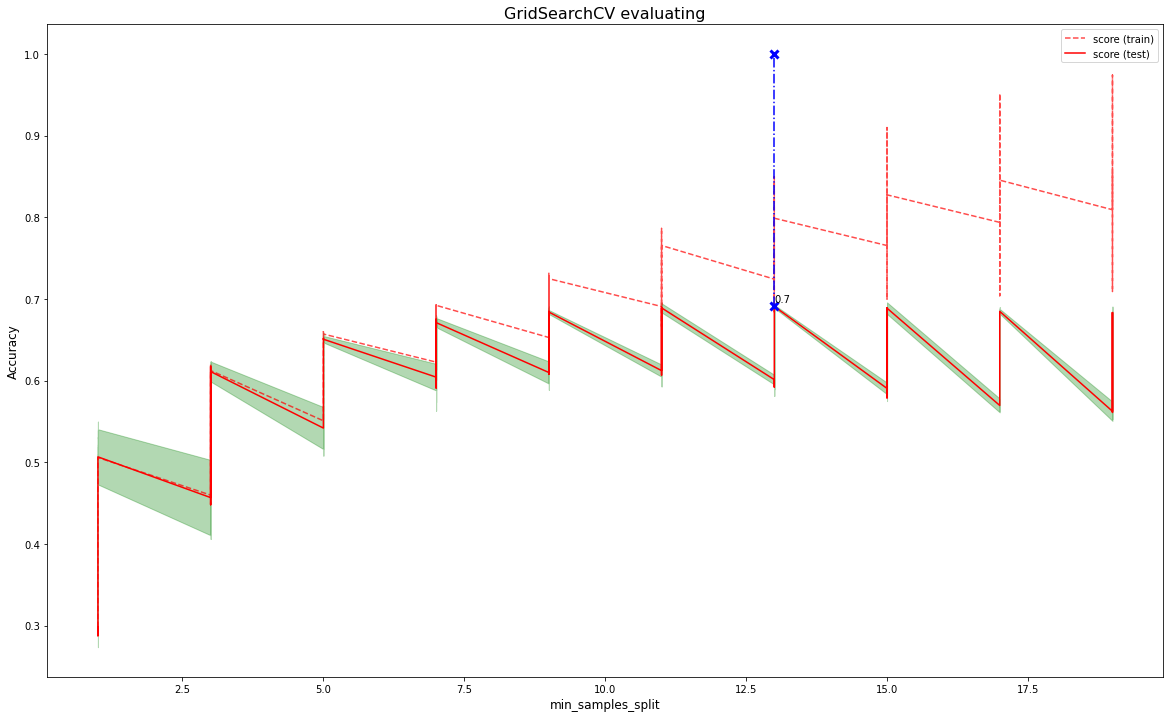

In [45]:
random_forest = tune_random_forest_params(X_train, y_train)

###  سوال 2)  
####  n_estimators  
این پارامتر تعداد درختان است. هر چه درختان نامرتبط در جنگل ما بیشتر باشد، خطاهای مربوط به آنها به میانگین نزدیک تر می شود. با این حال، زیاد کردن این پارامترهمیشه بهتر نیست  تعداد درختان بیشتر محاسبات را نبز بیشتر می‌کند.
####  max_depth  
برای جلوگیری از overfitting ، باید در مرحله‌ی train آزادی درخت تصمیم رو محدود کنید.(Regularization) هایپرپارامترهای Regularization بستگی به الگوریتم دارند اما عموماً می‌توانیم حداکثر عمق الگوریتم رو تعیین کنیم. در Scikit-Learn این کار را با استفاده از max_depth انجام می‌دهیم. مقدار default این هایپرپارامتر None است کم‌کردن max_depth مدل را Regularize میکند و احتمال overfitting را کم می‌کند.
####  min_samples_leaf
به عنوان مثال، min_samples_leaf = 10 ، وفتی تعداد گره انتهایی هر شاخه‌ای درخت کمتر از 10 برگ داشته باشد، اموزش در آن شاخه را متوقف کند این عمل نیز احتمال overfitting را کم می‌کند. 

###  سوال 3)  

In [47]:
def run_random_forest_model(random_forest):
    random_forest = random_forest.fit(X_train, y_train)
    train_pred = random_forest.predict(X_train)
    test_pred = random_forest.predict(X_test)
    print_prediction_results(train_pred, test_pred, ' Decision Tree ') 

In [48]:
run_random_forest_model(random_forest)

 *****   Decision Tree train set  ***** 
              precision    recall  f1-score   support

        Jazz       0.78      0.58      0.66      4000
 Alternative       0.96      0.92      0.94      4000
     Country       0.77      0.69      0.73      4000
         Rap       0.83      0.84      0.84      4000
        Rock       0.84      0.86      0.85      4000
   Classical       0.63      0.87      0.73      4000

    accuracy                           0.79     24000
   macro avg       0.80      0.79      0.79     24000
weighted avg       0.80      0.79      0.79     24000

 *****   Decision Tree test set  ***** 
              precision    recall  f1-score   support

        Jazz       0.57      0.38      0.45      1000
 Alternative       0.91      0.87      0.89      1000
     Country       0.67      0.61      0.63      1000
         Rap       0.70      0.71      0.71      1000
        Rock       0.75      0.79      0.77      1000
   Classical       0.53      0.74      0.62      10

###  سوال 4)
ماتریس آشفتگی مدل Random Forest

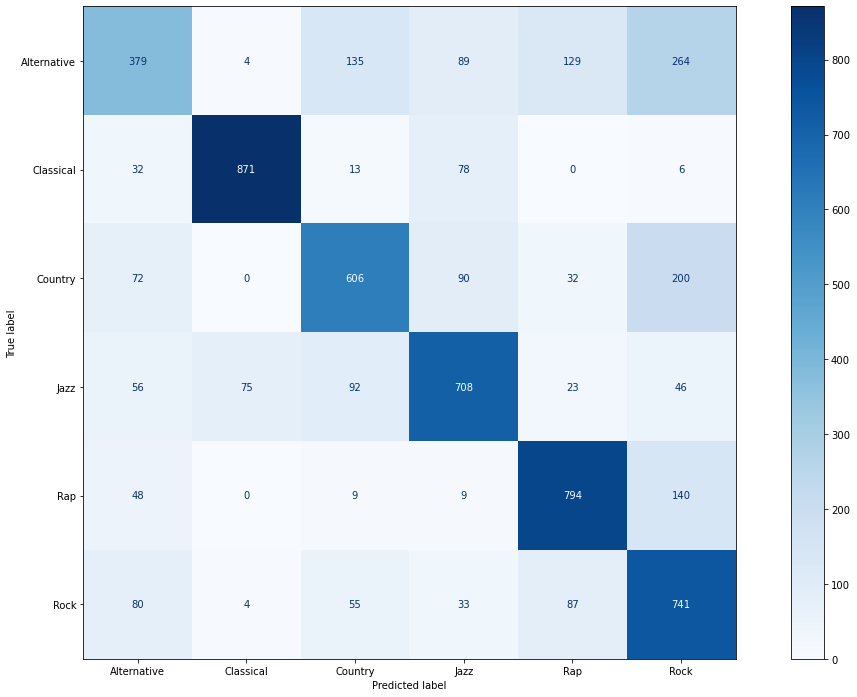

In [55]:
fig, ax = plt.subplots(figsize=(20, 12))
plot_confusion_matrix(random_forest, X_test, y_test, ax = ax, cmap='Blues')  